### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [145]:
data = pd.read_csv('data/coupons.csv')

In [146]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [147]:
#Check for the percentage of columnwise null values
null_values = data.isnull().sum().sort_values(ascending =  False)
percentage_of_total = 100*null_values/data.shape[0]
percentage_of_total

car                     99.148534
CoffeeHouse              1.710817
Restaurant20To50         1.490066
CarryAway                1.190476
RestaurantLessThan20     1.024913
Bar                      0.843582
destination              0.000000
passanger                0.000000
direction_opp            0.000000
direction_same           0.000000
toCoupon_GEQ25min        0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ5min         0.000000
income                   0.000000
occupation               0.000000
education                0.000000
has_children             0.000000
maritalStatus            0.000000
age                      0.000000
gender                   0.000000
expiration               0.000000
coupon                   0.000000
time                     0.000000
temperature              0.000000
weather                  0.000000
Y                        0.000000
dtype: float64

3. Decide what to do about your missing data -- drop, replace, other...

### The car column has around 99% null values, hence it is practically useless for analysis or extracting valuable insights

### The remaining columns had approximately 1-2 % null values, hence dropping rows containing at least one null value didn't appear to be too much of an issue

In [148]:
data = data.drop(columns = ['car'])
data = data.dropna()

4. What proportion of the total observations chose to accept the coupon? 



In [149]:
print(np.mean(data['Y']))

0.5693352098683666


5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 1.0, 'Coupon Type Count Breakdown')

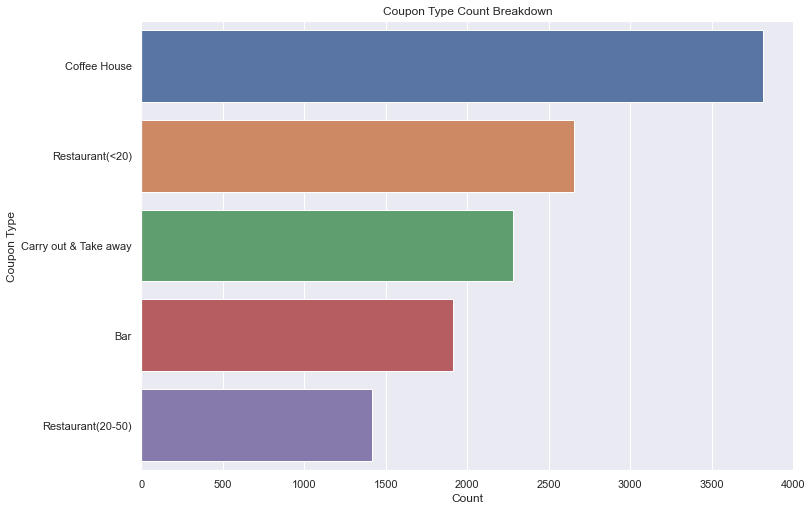

In [150]:
coupon_counts = data['coupon'].value_counts().to_frame().reset_index().rename(columns = {
    'index': 'Coupon Type',
    'coupon': 'Count'
}).sort_values('Count', ascending = False)

sns.barplot(y = 'Coupon Type', x = 'Count', data = coupon_counts)
plt.title('Coupon Type Count Breakdown')

6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Count histogram of the temperature attribute \n with overlayed KDE (kernel density estimate)')

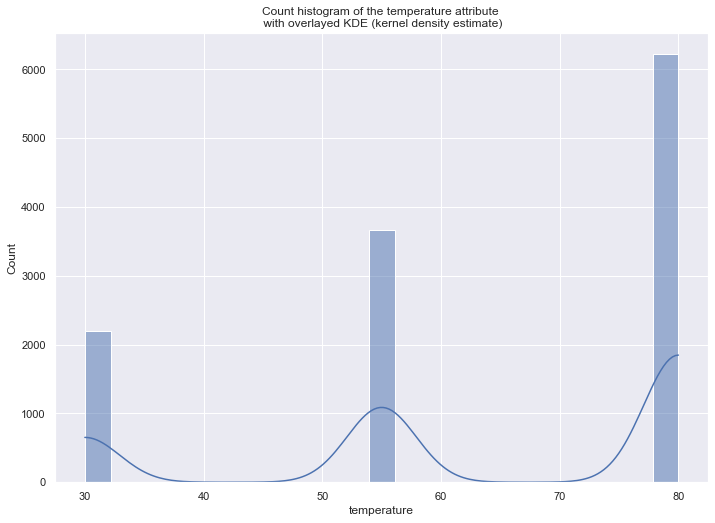

In [151]:
sns.histplot(x = 'temperature', data = data, kde = True)
plt.title('Count histogram of the temperature attribute \n with overlayed KDE (kernel density estimate)')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [152]:
bar_data = data[data['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


In [153]:
np.mean(bar_data['Y'])

0.41191845269210664

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [154]:
bar_data['Bar'].value_counts()

never    788
less1    553
1~3      379
4~8      147
gt8       46
Name: Bar, dtype: int64

/var/folders/pm/4_sx8tgs6j91b49hvjnrs7cr0000gn/T/ipykernel_1850/670603260.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_data['bar_breakdown'] = bar_data['Bar'].apply(bar_times_breakdown)


Text(0.5, 0, 'Bar Frequency Breakdown')

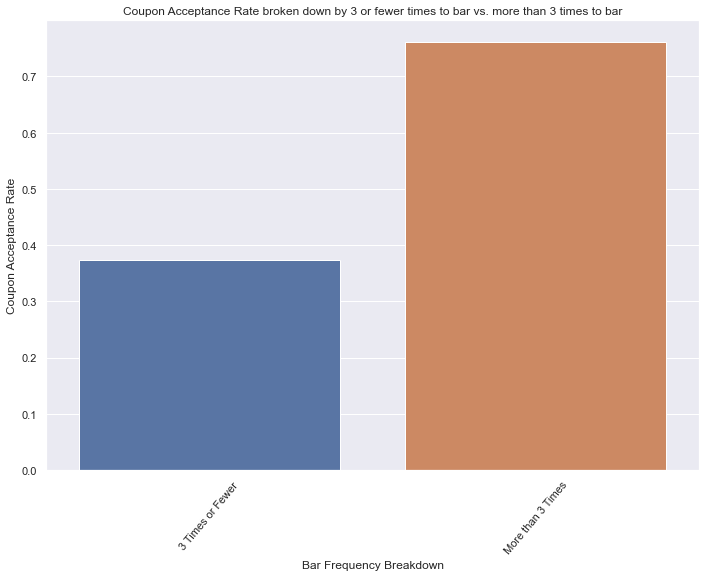

In [155]:
def bar_times_breakdown(val):
    if val in ['never', 'less1', '1~3']:
        return '3 Times or Fewer'
    return 'More than 3 Times'


bar_data['bar_breakdown'] = bar_data['Bar'].apply(bar_times_breakdown)
bar_frequency_acceptance_rate = bar_data[['bar_breakdown', 'Y']].groupby('bar_breakdown', as_index = False).agg(np.mean)
bar_frequency_acceptance_rate

sns.barplot(x = 'bar_breakdown', y = 'Y', data = bar_frequency_acceptance_rate)
plt.xticks(rotation = 50)
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.ylabel('Coupon Acceptance Rate')
plt.title('Coupon Acceptance Rate broken down by 3 or fewer times to bar vs. more than 3 times to bar')
plt.xlabel('Bar Frequency Breakdown')


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [156]:
bar_data['age'].value_counts()

21         397
26         368
31         324
50plus     273
36         196
41         171
46         103
below21     81
Name: age, dtype: int64

In [157]:
more_than_once_and_over_twentyfive = bar_data[(~bar_data['Bar'].isin(['never', 'less1'])) & (~bar_data['age'].isin(['below21', '21']))]
more_than_once_and_over_twentyfive_rate = np.mean(more_than_once_and_over_twentyfive['Y'])
print("Go to bar once a month and are above the age of 25 acceptance rate: ", more_than_once_and_over_twentyfive_rate)

other_cond = (bar_data['Bar'].isin(['never', 'less1'])) & (~bar_data['age'].isin(['below21', '21']))
other_cond = (other_cond) | (~bar_data['Bar'].isin(['never', 'less1'])) & (~bar_data['age'].isin(['below21', '21']))
other_cond = (other_cond) | (bar_data['Bar'].isin(['never', 'less1'])) & (~bar_data['age'].isin(['below21', '21']))
other_rate = np.mean(bar_data[other_cond]['Y'])
print("All others acceptance rate", other_rate)


Go to bar once a month and are above the age of 25 acceptance rate:  0.6898263027295285
All others acceptance rate 0.38606271777003487


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [158]:
bar_data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y', 'bar_breakdown'],
      dtype='object')

In [159]:
bar_data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,bar_breakdown
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,1,3 Times or Fewer
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,1,0,1,3 Times or Fewer
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,4~8,4~8,less1,1,1,1,0,1,1,3 Times or Fewer
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,1~3,1~3,never,1,0,0,0,1,0,3 Times or Fewer
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,1~3,1~3,never,1,0,0,1,0,0,3 Times or Fewer


In [160]:
bar_data['passanger'].value_counts()

Alone        1141
Friend(s)     318
Partner       260
Kid(s)        194
Name: passanger, dtype: int64

In [161]:
bar_data['occupation'].value_counts()

Unemployed                                   292
Student                                      237
Computer & Mathematical                      225
Sales & Related                              175
Education&Training&Library                   125
Management                                   108
Office & Administrative Support              101
Arts Design Entertainment Sports & Media      88
Business & Financial                          82
Retired                                       71
Healthcare Support                            44
Food Preparation & Serving Related            43
Community & Social Services                   40
Healthcare Practitioners & Technical          36
Transportation & Material Moving              35
Legal                                         34
Protective Service                            27
Architecture & Engineering                    27
Personal Care & Service                       25
Construction & Extraction                     24
Life Physical Social

In [167]:
drivers_bar_more_than_once_per_month_rate = np.mean(bar_data[~bar_data['Bar'].isin(['never', 'less1'])]['Y'])
print('Drivers bar more than once per month acceptance rate', drivers_bar_more_than_once_per_month_rate)

passengers_not_a_kid_rate = np.mean(bar_data[bar_data['passanger'] != 'Kid(s)']['Y'])
print('Passengers without kid acceptance rate', passengers_not_a_kid_rate)

occs_besides_farming_fishing_forestry_rate = np.mean(bar_data[bar_data['occupation'] != 'Farming Fishing & Forestry']['Y'])
print('Occupation besides farrming, fishing, and forestry acceptance rate', occs_besides_farming_fishing_forestry_rate)     


Drivers bar more than once per month acceptance rate 0.6853146853146853
Passengers without kid acceptance rate 0.4351367073880163
Occupation besides farrming, fishing, and forestry acceptance rate 0.4117647058823529


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [168]:
bar_data['maritalStatus'].value_counts()

Married partner      833
Single               638
Unmarried partner    352
Divorced              73
Widowed               17
Name: maritalStatus, dtype: int64

In [169]:
bar_data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,bar_breakdown
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,1,3 Times or Fewer
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,1,0,1,3 Times or Fewer
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,4~8,4~8,less1,1,1,1,0,1,1,3 Times or Fewer
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,1~3,1~3,never,1,0,0,0,1,0,3 Times or Fewer
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,1~3,1~3,never,1,0,0,1,0,0,3 Times or Fewer


In [170]:
bar_data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y', 'bar_breakdown'],
      dtype='object')

In [171]:
bar_data['RestaurantLessThan20'].value_counts()

1~3      839
4~8      548
less1    312
gt8      186
never     28
Name: RestaurantLessThan20, dtype: int64

In [172]:
bar_data['income'].value_counts()

$25000 - $37499     300
$100000 or More     282
$12500 - $24999     271
$50000 - $62499     249
$37500 - $49999     247
Less than $12500    159
$75000 - $87499     143
$87500 - $99999     133
$62500 - $74999     129
Name: income, dtype: int64

In [173]:
#First case: go to bars more than once a month, had passengers that were not a kid, and were not widowed 
first_case_cond = (~bar_data['Bar'].isin(['never', 'less1'])) & (bar_data['passanger'] != 'Kid(s)') & (bar_data['maritalStatus'] != 'Widowed')
first_case_rate = np.mean(bar_data[first_case_cond]['Y'])
print('First case acceptance rate', first_case_rate)

#Second case: go to bars more than once a month and are under the age of 30
second_case_cond = (~bar_data['Bar'].isin(['never', 'less1'])) & (bar_data['age'].isin(['below21', '21', '26']))
second_case_rate = np.mean(bar_data[second_case_cond]['Y'])
print('Second case acceptance rate', second_case_rate)

#Third case: go to cheap restaurants more than 4 times a month and income is less than 50K
third_case_cond = (bar_data['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & (bar_data['income'].isin(['Less than $12500',
                                                                                 '$12500 - $24999',
                                                                                 '$25000 - $37499',
                                                                                 '$37500 - $49999']))
third_case_rate = np.mean(bar_data[third_case_cond]['Y'])
print('Third case acceptance rate', third_case_rate)


First case acceptance rate 0.7094339622641509
Second case acceptance rate 0.7195121951219512
Third case acceptance rate 0.45645645645645644


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

I hypothesize that drives who purchased coupons tended to be under the age of 30, did not have kids in the car,  and did not fall under the low income bracket

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

### Break down the coupon acceptance rate by Weather and Gender

In [175]:
weather = bar_data[['weather', 'gender', 'Y']].groupby(['weather', 'gender'], as_index = False).agg(np.mean)
weather


,weather,gender,Y
0,Rainy,Female,0.278846
1,Rainy,Male,0.450000
2,Snowy,Female,0.216667
3,Snowy,Male,0.443396
4,Sunny,Female,0.384036
5,Sunny,Male,0.507317


Text(0.5, 1.0, 'Coupon Acceptance Rate broken down by Weather and Gender')

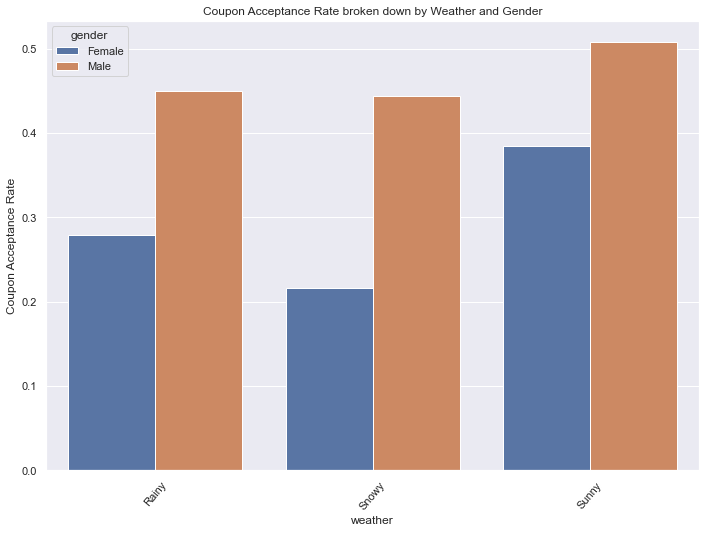

In [176]:
sns.barplot(x = 'weather', y = 'Y', hue = 'gender', data = weather)
plt.xticks(rotation = 50)
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.ylabel('Coupon Acceptance Rate')
plt.title('Coupon Acceptance Rate broken down by Weather and Gender')

## Observations

### 1. Regardless of the weather on the particular driving day, males were consistently more likely to accept the bar coupon than females
### 2. For both males and females alike, individuals that were driving past on a Sunny day were generally the most likely to accept the coupon, as opposed to during Rainy weather and Snowy weather respectively in descending order of general likelihood to accept the bar coupon. 